In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Results/preliminary_results_updated.csv")

In [3]:
df.head()

,Model Type,ID,Sensor,Hours in Advance,Event,Augmentation,Model,Train AU-ROC,Val AU-ROC,Test AU-ROC,Train AU-PRC,Val AU-PRC,Test AU-PRC,RAM,Time
0,indv,3-jk,left,dlh0,classification,smote,lstm,0.843616,0.864925,0.942007,0.771311,0.824186,0.019621,2.342793,2393.490197
1,indv,3-jk,left,dlh0,classification,smote,ann,0.756636,0.829529,0.891369,0.655539,0.745903,0.012594,1.605663,623.502905
2,indv,3-jk,left,dlh0,classification,smote,simplernn,0.856357,0.880638,0.976219,0.775613,0.808828,0.048061,1.848442,1904.338959
3,indv,3-jk,left,dlh0,classification,smote,randomforest,0.981982,0.983226,0.981578,0.975131,0.970459,0.040755,0.445858,832.421990
4,indv,3-jk,left,dlh0,classification,smote,lr,0.923836,0.925517,0.908668,0.849895,0.890259,0.019713,0.368980,0.827717


In [4]:
# Rename certain columns
col_rename_map = {col: ' '.join(col.split(' ')[::-1])
                  for col in df.filter(like = 'AU').columns}

col_rename_map

{'Train AU-ROC': 'AU-ROC Train',
 'Val AU-ROC': 'AU-ROC Val',
 'Test AU-ROC': 'AU-ROC Test',
 'Train AU-PRC': 'AU-PRC Train',
 'Val AU-PRC': 'AU-PRC Val',
 'Test AU-PRC': 'AU-PRC Test'}

In [5]:
df.rename(columns=col_rename_map, inplace = True)

In [6]:
ndf = pd.wide_to_long(df, stubnames = ['AU-ROC', 'AU-PRC'], 
                i = ['Model Type', 'ID', 'Sensor', 'Hours in Advance', 'Event', 'Augmentation', 'Model', 'RAM', 'Time'], 
                j='DataType', sep = ' ', suffix = r'\w+').reset_index().fillna('None')

In [7]:
ndf.head(30)

,Model Type,ID,Sensor,Hours in Advance,Event,Augmentation,Model,RAM,Time,DataType,AU-ROC,AU-PRC
0,indv,3-jk,left,dlh0,classification,smote,lstm,2.342793,2393.490197,Train,0.843616,0.771311
1,indv,3-jk,left,dlh0,classification,smote,lstm,2.342793,2393.490197,Val,0.864925,0.824186
2,indv,3-jk,left,dlh0,classification,smote,lstm,2.342793,2393.490197,Test,0.942007,0.019621
3,indv,3-jk,left,dlh0,classification,smote,ann,1.605663,623.502905,Train,0.756636,0.655539
4,indv,3-jk,left,dlh0,classification,smote,ann,1.605663,623.502905,Val,0.829529,0.745903
5,indv,3-jk,left,dlh0,classification,smote,ann,1.605663,623.502905,Test,0.891369,0.012594
6,indv,3-jk,left,dlh0,classification,smote,simplernn,1.848442,1904.338959,Train,0.856357,0.775613
7,indv,3-jk,left,dlh0,classification,smote,simplernn,1.848442,1904.338959,Val,0.880638,0.808828
8,indv,3-jk,left,dlh0,classification,smote,simplernn,1.848442,1904.338959,Test,0.976219,0.048061
9,indv,3-jk,left,dlh0,classification,smote,randomforest,0.445858,832.421990,Train,0.981982,0.975131


In [25]:
aug_group = ndf.groupby('Augmentation')
aug_group_none = aug_group.get_group('None')
aug_group_smote = aug_group.get_group('smote')
aug_group_gauss = aug_group.get_group('gauss')

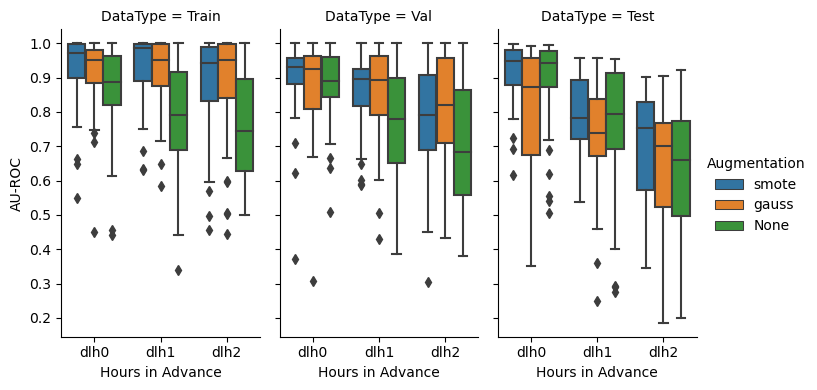

In [8]:
sns.catplot(
    data=ndf, x="Hours in Advance", y="AU-ROC", col="DataType", hue = 'Augmentation',
    kind="box", height=4, aspect=.6,
)

In [9]:
sns.catplot(
    data=ndf, x="Hours in Advance", y="AU-PRC", col="DataType", hue = 'Augmentation',
    kind="box", height=4, aspect=.6,
)

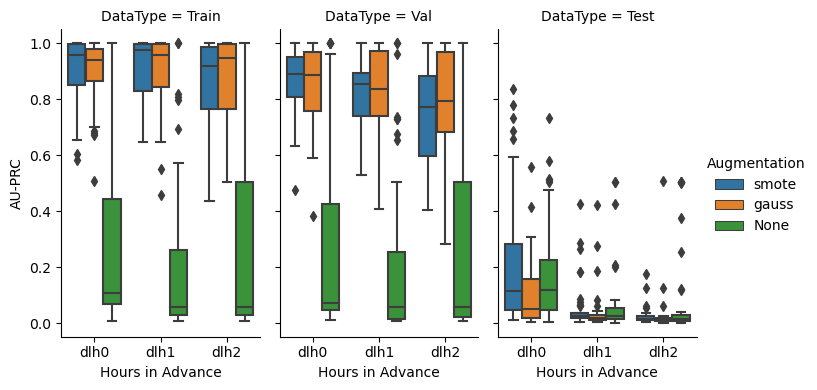

In [10]:
plt.show()

In [44]:
sns.catplot(
    data=aug_group_none, x="Hours in Advance", y="AU-ROC", col="DataType", hue = 'Model',
    kind="box", height=8, aspect=.8,
)

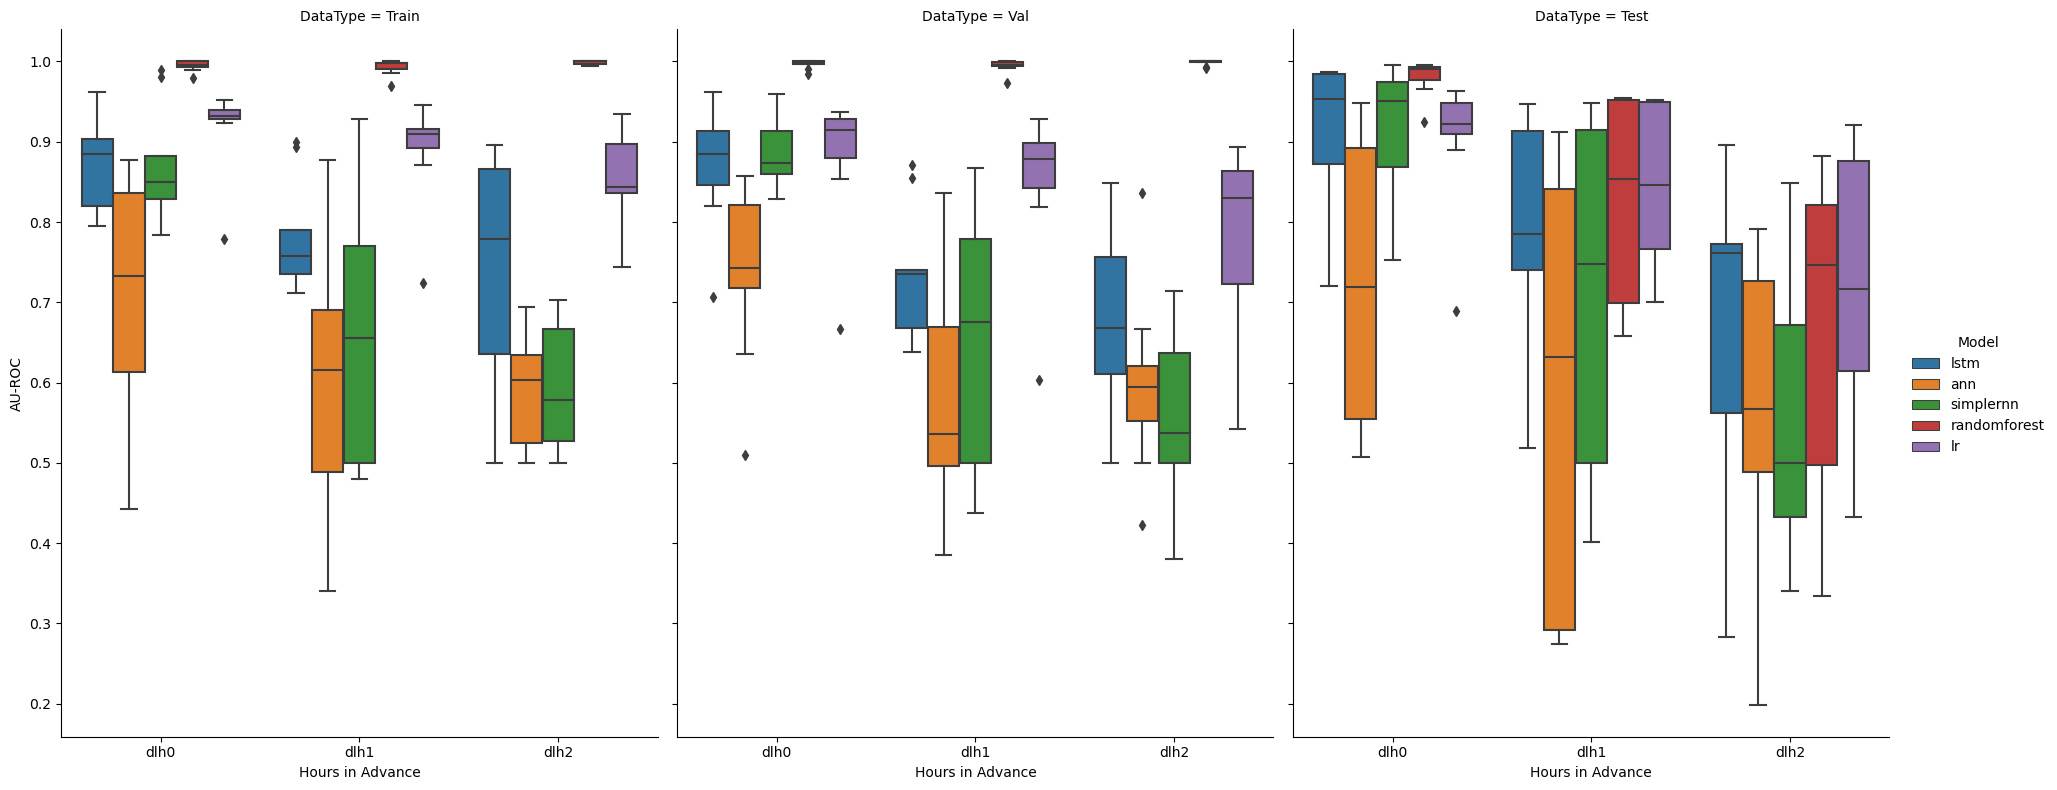

In [45]:
plt.show()

In [11]:
import dataprocessing as dp

In [12]:
subject = '3-jk'

In [13]:
all_subjects = ["1-sf", "10-rc", "12-mb", "17-sb", "19-me", "2-bd", "22-ap", "26-tc", "3-jk",
                      "31-ns", "32-rf", "36-af", "38-cs", "39-dg", "4-rs", "41-pk", "43-cm", "7-sb"]

train_subjects = set(all_subjects) - set(subject)

In [14]:
### Load the data
data1, target1 = dp.create_featured_dataset('1-sf', sensor='both', dlh=0, 
                                          keep_SH=False, keep_event=True, smote=None)

The beginning shape is:  (9902, 99)
After dropping rows with NaN in the SH_Event columns, the shape is:  (8112, 99)
NaN values in this dataset:  False
The left data frame set shape is:  (8112, 48)
The right data frame set shape is:  (8112, 48)
The keep left data frame set shape is:  (8112, 24)
The keep right data frame set shape is:  (8112, 24)
Not adding fake positive data samples.
Index(['t25_l', 't26_l', 't27_l', 't28_l', 't29_l', 't30_l', 't31_l', 't32_l',
       't33_l', 't34_l', 't35_l', 't36_l', 't37_l', 't38_l', 't39_l', 't40_l',
       't41_l', 't42_l', 't43_l', 't44_l', 't45_l', 't46_l', 't47_l', 't48_l'],
      dtype='object')
Index(['t25_r', 't26_r', 't27_r', 't28_r', 't29_r', 't30_r', 't31_r', 't32_r',
       't33_r', 't34_r', 't35_r', 't36_r', 't37_r', 't38_r', 't39_r', 't40_r',
       't41_r', 't42_r', 't43_r', 't44_r', 't45_r', 't46_r', 't47_r', 't48_r'],
      dtype='object')


In [15]:
### Load the data
data10, target10 = dp.create_featured_dataset('10-rc', sensor='both', dlh=0, 
                                          keep_SH=False, keep_event=True, smote=None)

The beginning shape is:  (8240, 99)
After dropping rows with NaN in the SH_Event columns, the shape is:  (6913, 99)
NaN values in this dataset:  False
The left data frame set shape is:  (6913, 48)
The right data frame set shape is:  (6913, 48)
The keep left data frame set shape is:  (6913, 24)
The keep right data frame set shape is:  (6913, 24)
Not adding fake positive data samples.
Index(['t25_l', 't26_l', 't27_l', 't28_l', 't29_l', 't30_l', 't31_l', 't32_l',
       't33_l', 't34_l', 't35_l', 't36_l', 't37_l', 't38_l', 't39_l', 't40_l',
       't41_l', 't42_l', 't43_l', 't44_l', 't45_l', 't46_l', 't47_l', 't48_l'],
      dtype='object')
Index(['t25_r', 't26_r', 't27_r', 't28_r', 't29_r', 't30_r', 't31_r', 't32_r',
       't33_r', 't34_r', 't35_r', 't36_r', 't37_r', 't38_r', 't39_r', 't40_r',
       't41_r', 't42_r', 't43_r', 't44_r', 't45_r', 't46_r', 't47_r', 't48_r'],
      dtype='object')


In [16]:
# General with holdout
train_data, train_target, hdata, htarget = dp.load_general_data_lstm('3-jk', sensor='both', dlh=0, 
                                          keep_SH=False, keep_event=True, smote=None)

The beginning shape is:  (9902, 99)
After dropping rows with NaN in the SH_Event columns, the shape is:  (8112, 99)
NaN values in this dataset:  False
The left data frame set shape is:  (8112, 48)
The right data frame set shape is:  (8112, 48)
The keep left data frame set shape is:  (8112, 24)
The keep right data frame set shape is:  (8112, 24)
Not adding fake positive data samples.
Index(['t25_l', 't26_l', 't27_l', 't28_l', 't29_l', 't30_l', 't31_l', 't32_l',
       't33_l', 't34_l', 't35_l', 't36_l', 't37_l', 't38_l', 't39_l', 't40_l',
       't41_l', 't42_l', 't43_l', 't44_l', 't45_l', 't46_l', 't47_l', 't48_l'],
      dtype='object')
Index(['t25_r', 't26_r', 't27_r', 't28_r', 't29_r', 't30_r', 't31_r', 't32_r',
       't33_r', 't34_r', 't35_r', 't36_r', 't37_r', 't38_r', 't39_r', 't40_r',
       't41_r', 't42_r', 't43_r', 't44_r', 't45_r', 't46_r', 't47_r', 't48_r'],
      dtype='object')
The beginning shape is:  (8240, 99)
After dropping rows with NaN in the SH_Event columns, the 

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 8112 and the array at index 1 has size 6913